In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
from community import community_louvain
import matplotlib.cm as cm

In [27]:
# ! pip install community
# ! pip install python-louvain

In [28]:
heros=pd.read_csv('dataset/hero-network.csv')
nodes=pd.read_csv('dataset/nodes.csv')
edges=pd.read_csv('dataset/edges.csv')

In [29]:
heros.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [30]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [31]:
len(nodes)

19090

In [32]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [33]:
comic_node = nodes['node'][nodes['type'] == 'comic'].unique()
hero_node = nodes['node'][nodes['type'] == 'hero'].unique()

In [34]:
edge_lst=edges.values.tolist()

In [35]:
edge_tuple=[tuple(x) for x in edge_lst]

In [36]:
comic_lst=comic_node.tolist()
hero_lst=hero_node.tolist()

In [37]:
type(comic_node)

numpy.ndarray

In [38]:
bipart = nx.Graph()
bipart.add_nodes_from(comic_lst, bipartite=0)
bipart.add_nodes_from(hero_lst, bipartite=1)
bipart.add_node("SPIDER-MAN/PETER PARKER", bipartite=1)
bipart.add_edges_from(edge_tuple)

In [39]:
top_nodes=set(comic_node)
bottom_nodes=set(hero_node)

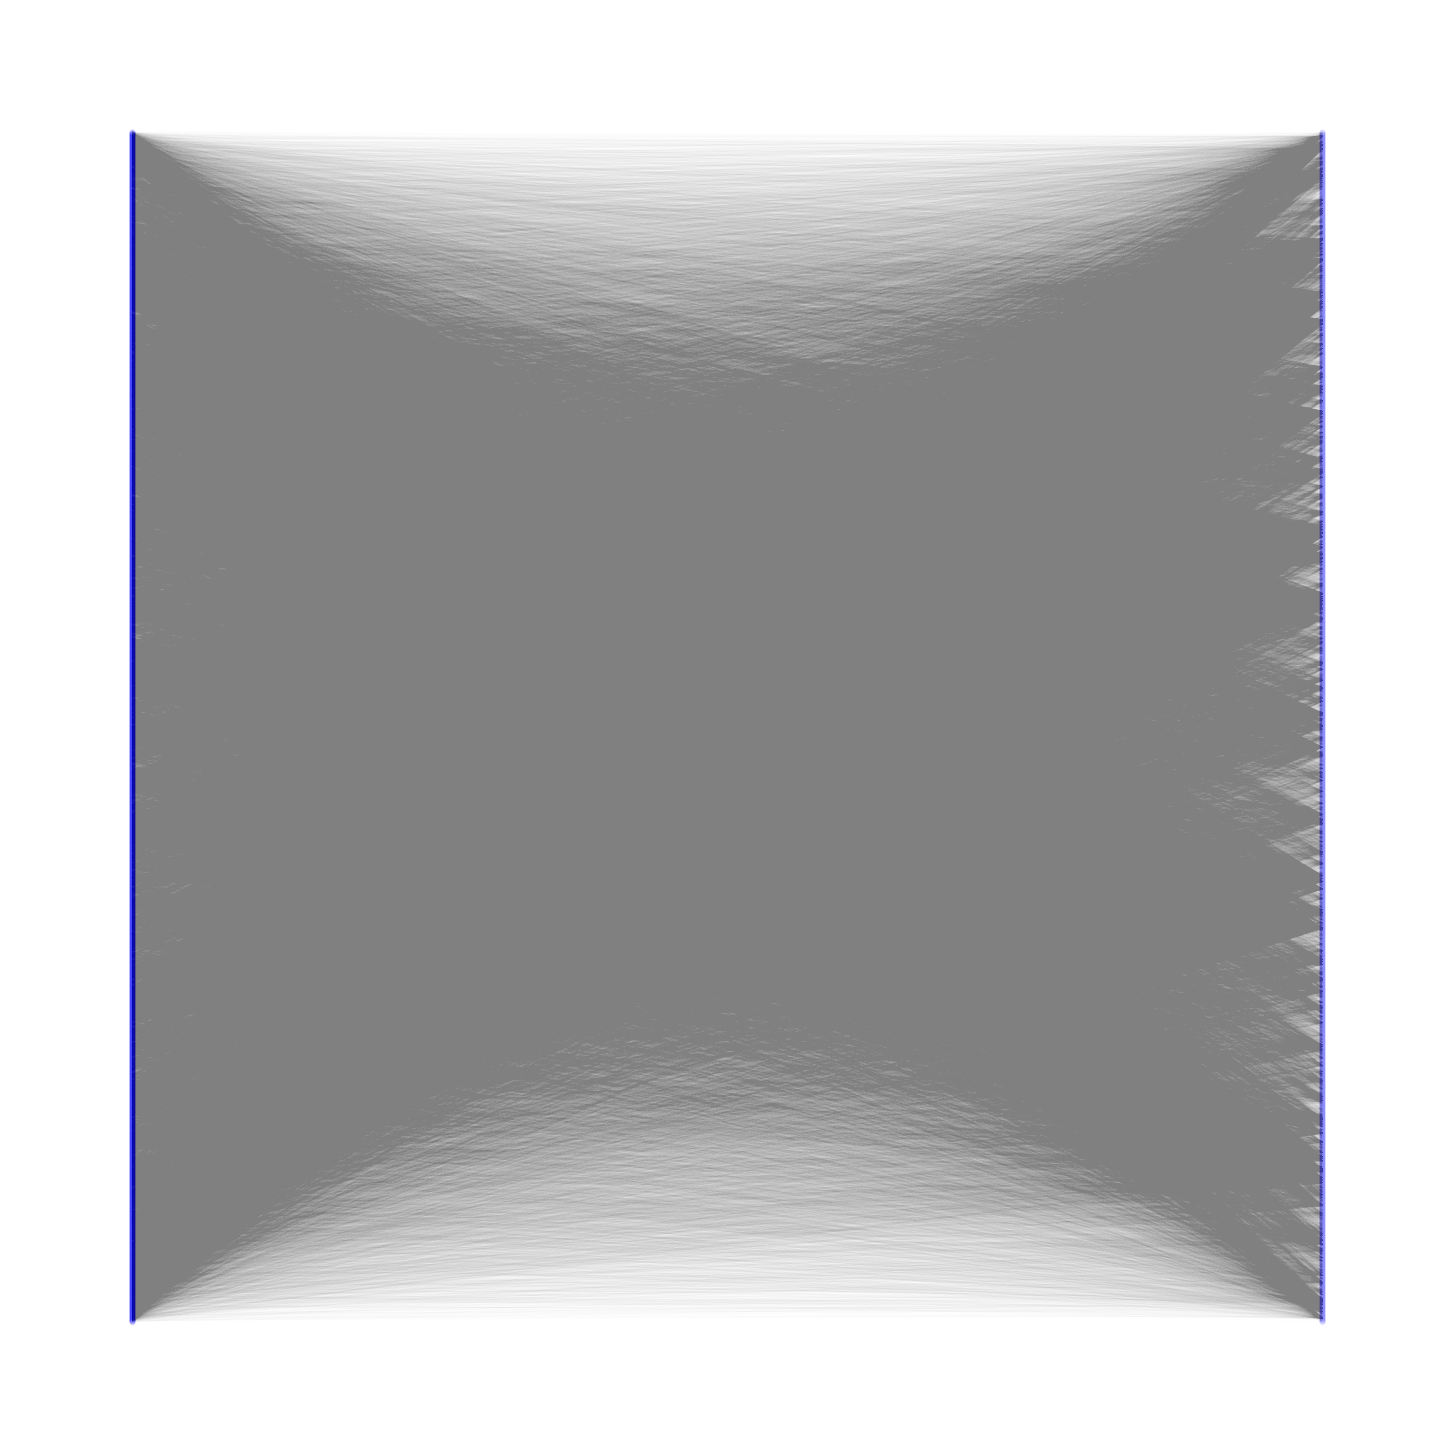

In [40]:
plt.figure(figsize=(20,20))
pos=bipartite_layout(bipart,top_nodes,align='vertical')
nx.draw(bipart,pos=pos,node_size=30,edge_color='grey',node_color='blue', alpha = 0.01)
plt.show()

In [41]:
hero_graph=bipartite.projected_graph(bipart,hero_lst)

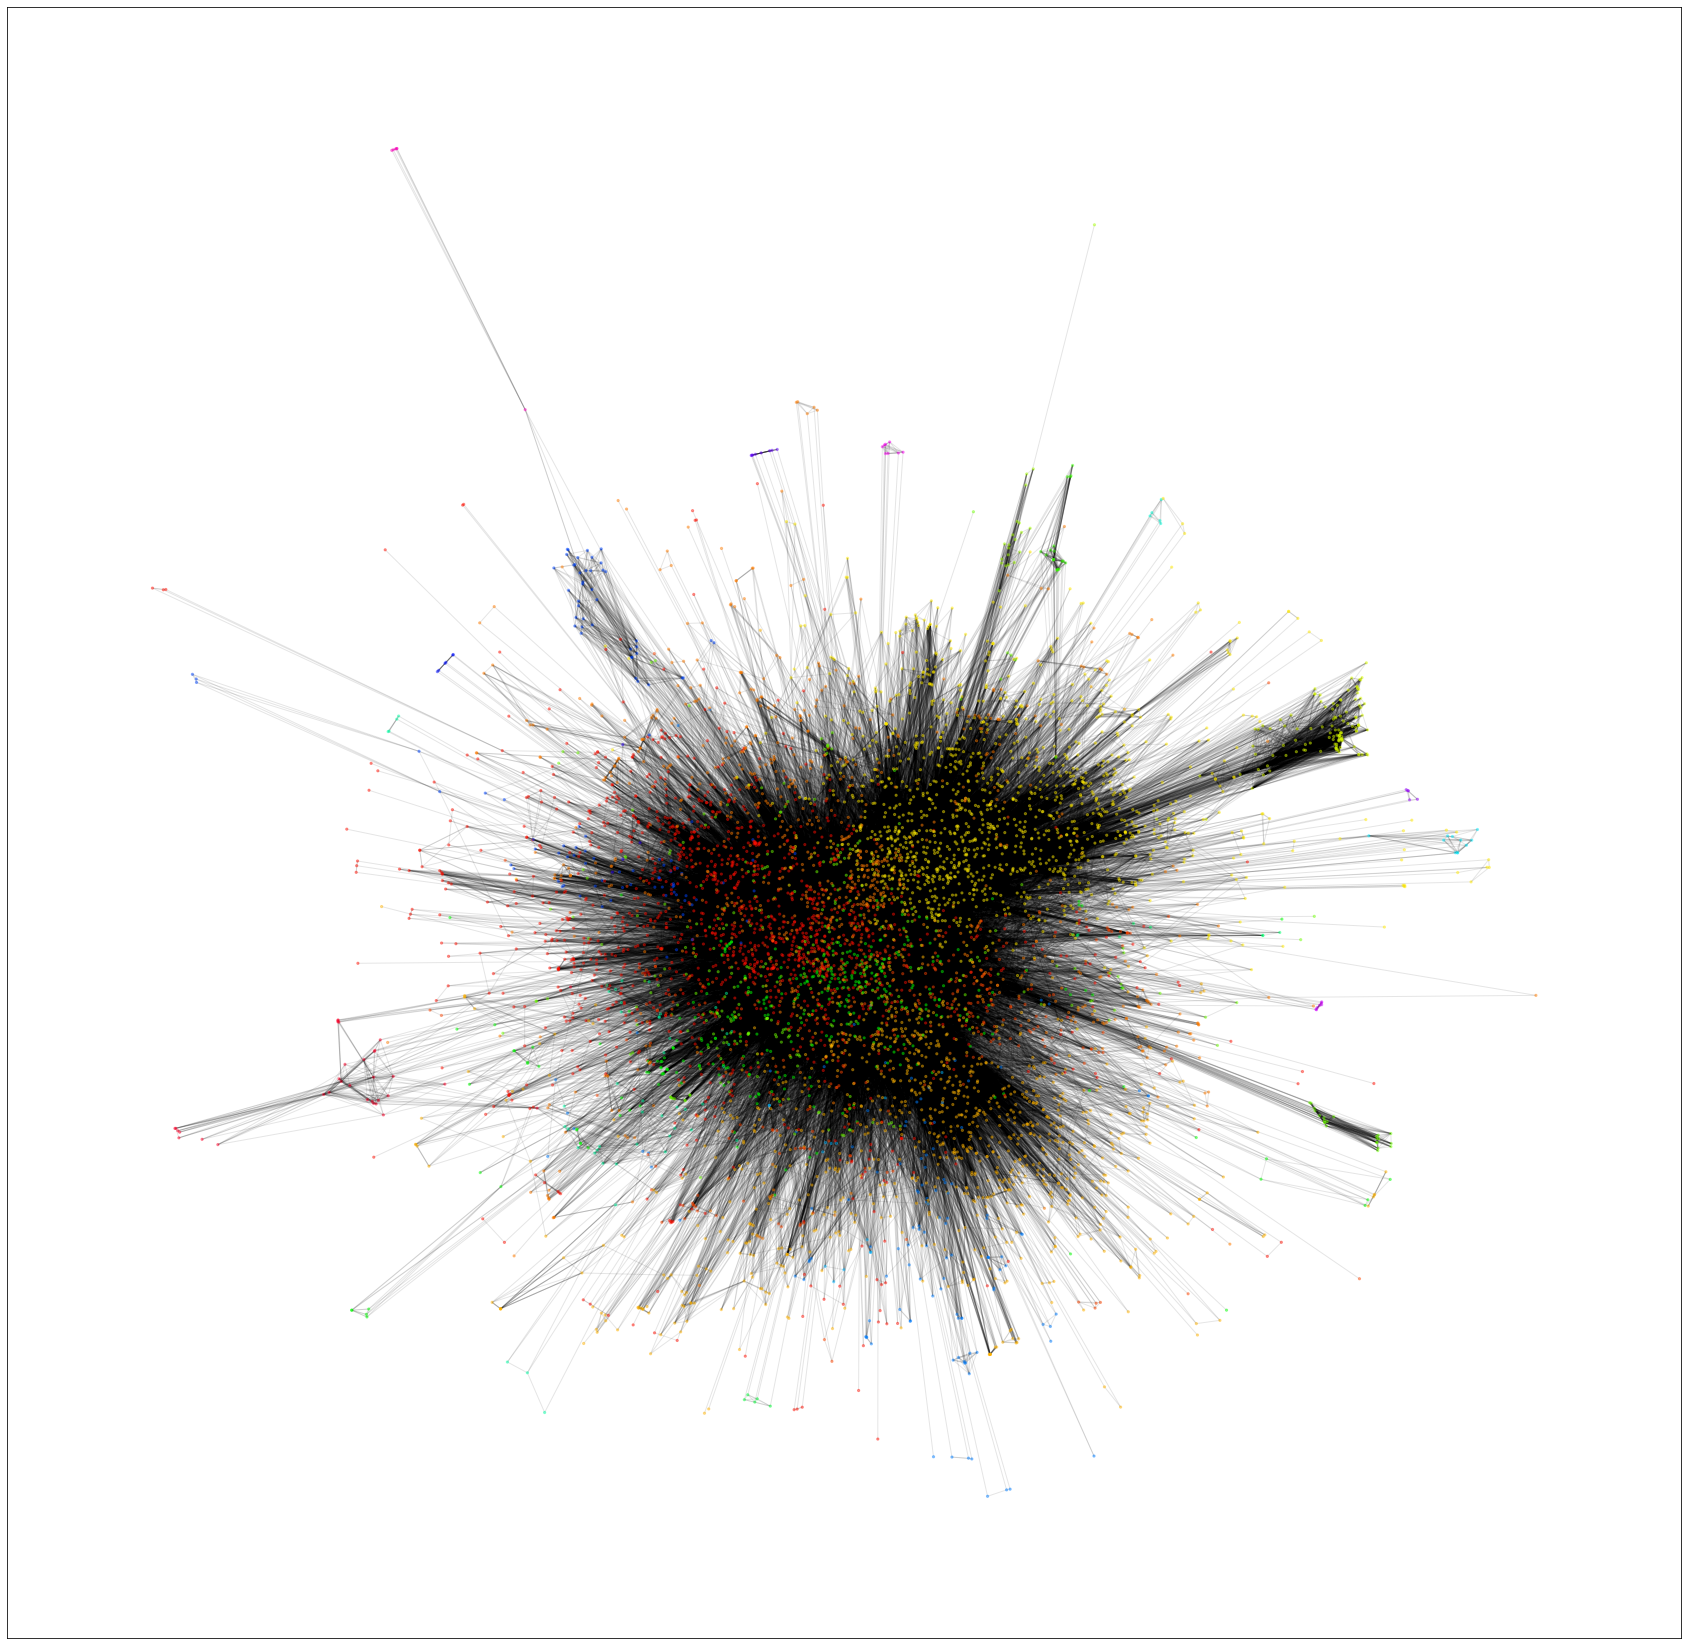

In [54]:
community=hero_graph.subgraph(sorted(nx.connected_components(hero_graph),reverse=True)[0])
partition=community_louvain.best_partition(community)
cmap=cm.get_cmap('gist_rainbow',max(partition.values())+1)
plt.figure(figsize=(30,30))
pos=nx.spring_layout(community)
nx.draw_networkx_nodes(community,pos,partition.keys(),node_size=5,alpha=0.4,cmap=cmap,node_color=list(partition.values()))
nx.draw_networkx_edges(community,pos,alpha=.1)
plt.show()